In [39]:
!pip install --upgrade pip

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com


In [40]:
!pip install awswrangler
!pip install matplotlib

%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com


In [41]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
# from pandas import datetime
import datetime as dt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [42]:
import awswrangler as wr
path = f"s3://source-voltar/source/apple_daily_close.csv"
df=wr.s3.read_csv(path)
df.head()

,date,open,high,low,close,adjclose,volume,ticker
0,2015-07-10,30.485001,30.962500,30.3025,30.820000,28.014683,245418000,AAPL
1,2015-07-13,31.257500,31.440001,31.0800,31.415001,28.555525,165762000,AAPL
2,2015-07-14,31.510000,31.592501,31.2600,31.402500,28.544163,127072400,AAPL
3,2015-07-15,31.430000,31.787500,31.3950,31.705000,28.819128,134596800,AAPL
4,2015-07-16,31.934999,32.142502,31.8375,32.127499,29.203169,144889600,AAPL


In [43]:
# import awswrangler as wr
path_pg = f"s3://source-voltar/source/proctergamble_daily_close.csv"
df_pg=wr.s3.read_csv(path_pg)
df_pg.head()

,date,open,high,low,close,adjclose,volume,ticker
0,2015-07-10,81.230003,81.360001,80.760002,80.949997,65.662651,6892500,PG
1,2015-07-13,81.519997,82.040001,81.339996,81.910004,66.441345,7332900,PG
2,2015-07-14,82.040001,82.459999,81.980003,82.040001,66.546799,6119500,PG
3,2015-07-15,81.910004,82.320000,81.839996,82.150002,66.636024,6673700,PG
4,2015-07-16,82.449997,82.550003,82.099998,82.300003,66.757706,6623400,PG


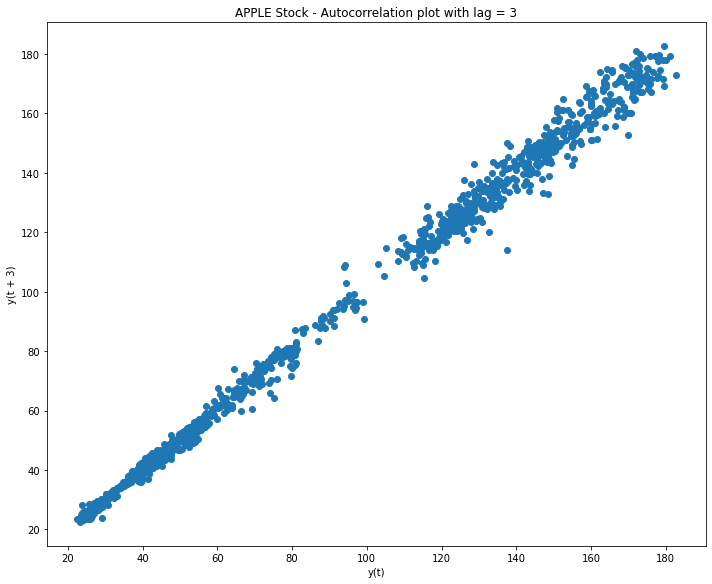

In [44]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = (10,8)
plt.figure()
lag_plot(df['open'], lag=3)
plt.tight_layout()
plt.title('APPLE Stock - Autocorrelation plot with lag = 3')
plt.savefig('plots/Stock-AutoCorrection-Plot.jpg',bbox_inches='tight')
plt.show()

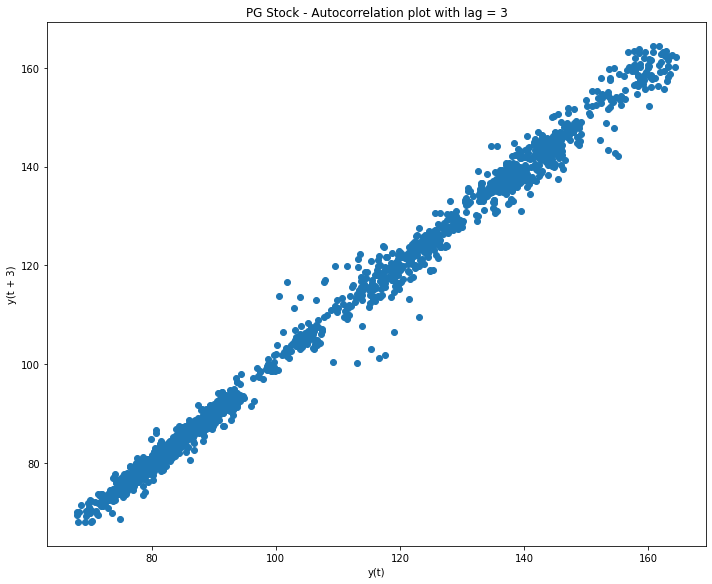

In [46]:
plt.rcParams["figure.figsize"] = (10,8)
plt.figure()
lag_plot(df_pg['open'], lag=3)
plt.tight_layout()
plt.title('PG Stock - Autocorrelation plot with lag = 3')
plt.savefig('plots/Stock-AutoCorrection-Plot_PG.jpg',bbox_inches='tight')
plt.show()

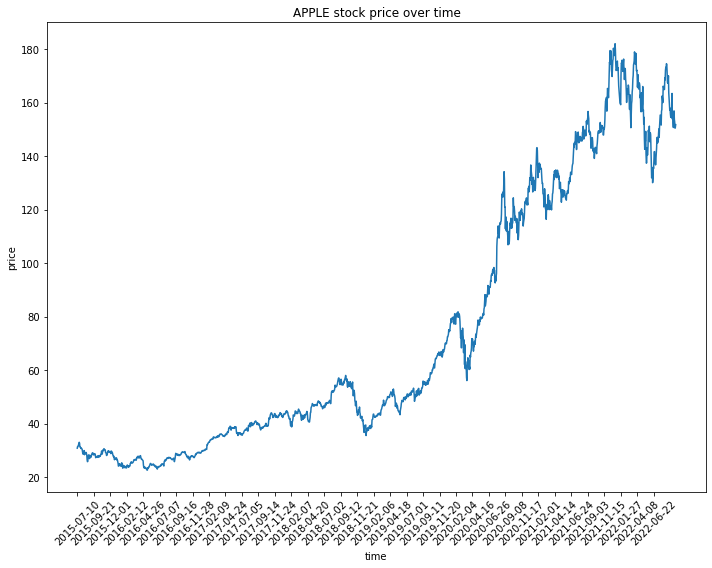

In [47]:
plt.rcParams["figure.figsize"] = (10,8)
plt.plot(df["date"], df["close"])
plt.xticks(np.arange(0,1764, 50), df['date'][0:1764:50],rotation = 45)
plt.title("APPLE stock price over time")
plt.xlabel("time")
plt.ylabel("price")
plt.tight_layout()
# plt.savefig('plots/Stock-Price-Over-Time-Plot.jpg',bbox_inches='tight')
plt.savefig('plots/Stock-Price-Over-Time-Plot.jpg')
plt.show()

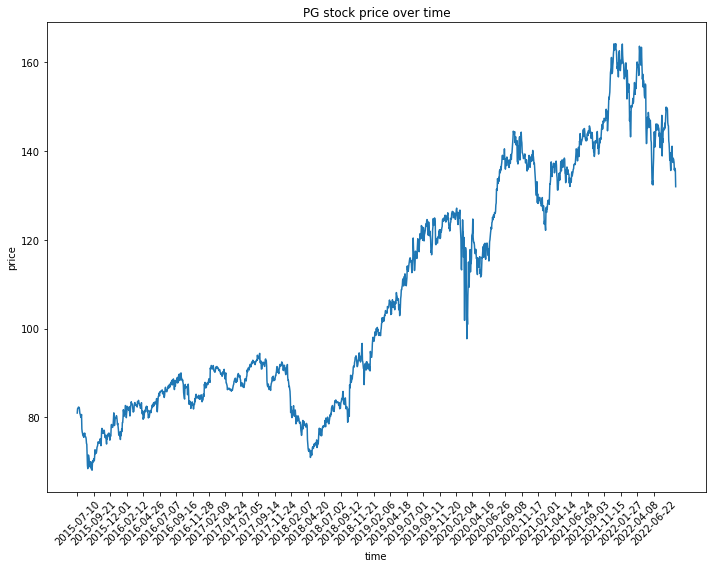

In [48]:
plt.rcParams["figure.figsize"] = (10,8)
plt.plot(df_pg["date"], df_pg["close"])
plt.xticks(np.arange(0,1764, 50), df_pg['date'][0:1764:50],rotation = 45)
plt.title("PG stock price over time")
plt.xlabel("time")
plt.ylabel("price")
plt.tight_layout()
# plt.savefig('plots/Stock-Price-Over-Time-Plot.jpg',bbox_inches='tight')
plt.savefig('plots/Stock-Price-Over-Time-Plot_PG.jpg')
plt.show()

In [49]:
train_data, test_data = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):]
training_data = train_data['close'].values
test_data = test_data['close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(3,1,0))
    # model_fit = model.fit(disp=0)
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))

Testing Mean Squared Error is 7.989536692560045


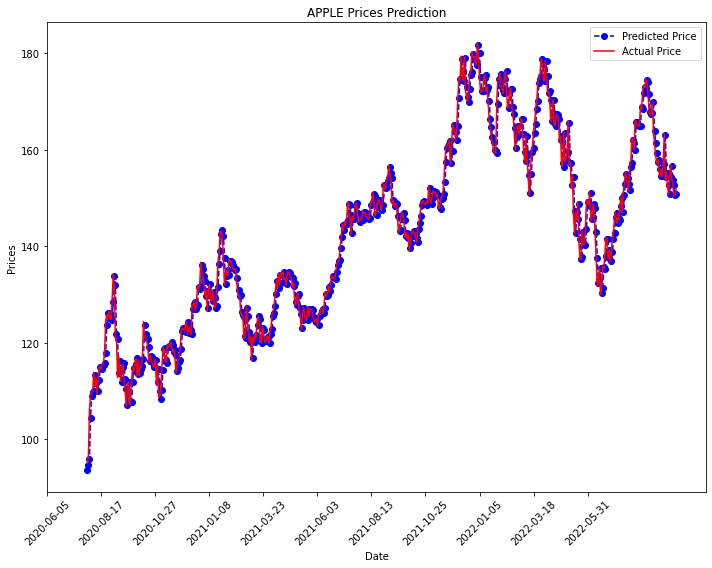

In [50]:
test_set_range = df[int(len(df)*0.7):].index
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('APPLE Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.xticks(np.arange(1235,1764,50), df.date[1235:1764:50], rotation = 45)
plt.legend()
plt.tight_layout()
plt.savefig('plots/Stock-Price-Prediction-Plot.jpg',bbox_inches='tight')
plt.show()

In [53]:
# test_set_range_pg = df_pg[0:int(len(df_pg))].index
# test_data_pg = df_pg
# plt.plot(test_set_range_pg, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
# plt.plot(test_set_range_pg, test_data_pg, color='red', label='Actual Price')
# plt.title('PG Prices Prediction')
# plt.xlabel('Date')
# plt.ylabel('Prices')
# plt.xticks(np.arange(1235,1764,50), df.date[1235:1764:50], rotation = 45)
# plt.legend()
# plt.tight_layout()
# plt.savefig('plots/Stock-Price-Prediction-Plot_PG.jpg',bbox_inches='tight')
# plt.show()